# Chapter 4: Fractal storing and processing

Chapter 4 of the book [PL] <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") written by <i>Jacek Kudrewicz</i> describes how to set parameters to draw IFS.

I want to honor authors of books, papers and code examples which are used by me during my learning. That's why every new notebook will start from the list of literature.

## Bibliography:

#### Base:
* <b>Fraktale i chaos</b> (eng.: "Fractals and Chaos") by <i>Jacek Kudrewicz</i>.

#### Additional:

* 

## 4.1 Fractal image characterized by a set of parameters

a) How many records need to be stored to retrieve fractal image?

<b>Assumption:</b> Image $ A_{\infty} $ is created by the probabilistic algorithm of set:

$$\begin{equation}
[R^2; w_{1}, w_{2}, ..., w_{k}; p_{1}, p_{2}, ..., p_{k}]
\end{equation}$$

where each function $ w_{i} $ is affine transformation described by six parameters $ a_{11}, a_{12}, a_{21}, a_{22}, c_{1}, c_{2} $ with own probability $ p_{i} $. To memorize whole fractal image we need to know only $7 * k$ numbers.
If probabilities $ p_{1}, ..., p_{i}, ..., p_{k} $ may be calculated then we need to store only $ 6 * k $ numbers.

b) How to calculate probability of a chance to draw a given point?

-> This is very interesting question for me :) I thought about this in chapter 3.

- set all probabilities to be equal ($ \frac{1}{k} $) or
- calculate probabilities based on the parameters $ a_{11}, a_{12}, a_{21}, a_{22} $.

c) If I know function's parameters how can I calculate probabilities?

Author of "Fractals and Chaos" tells: if all transformations are similar and all attractor images are dually disjoint (whatever this means* :) ) then <b>the optimal solution for finding a probability is</b>:

$$ p_{i} = |J_{i}|^r $$

where:

* $ J_{i} $ is a Jacobian of i-th transformation.
* $ r $ is calculated on the basis that $ \sum_{i} p_{i} = 1 $.

Below example of this process.

## Example 4.1: Barnsley Fern

Example values:

No. | $ a_{11} $ | $ a_{12} $ | $ a_{21} $ | $ a_{22} $ | $ c_{1} $ | $ c_{2} $ | $ p $ |
--- | ---------- | ---------- | ---------- | ---------- | --------- | --------- | ----- |
1 | 0.240 | -0.007 | 0.007 | 0.015 | 0 | 0 | ? |
2 | 0.220 | -0.330 | 0.360 | 0.100 | 0.540 | 0 | ? |
3 | 0.140 | -0.360 | -0.380 | -0.100 | 1.400 | 0 | ? |
4 | 0.800 | 0.100 | -0.100 | 0.800 | 1.600 | 0 | ? |

Base equations:

$$ x' = a_{11}x + a_{12}y + c_{1} $$

$$ y' = a_{21}x + a_{22}y + c_{2} $$

as $ c_{2} = 0 $ in each case then:

$$ y' = a_{21}x + a_{22}y $$

The first thing to do is to calculate Jacobian determinant of each set of equations. The process is straightforward if you know basic calculus, here's the solution by hand for the first transformation:

$$ x' = 0.24 * x - 0.007 * y + 0.015 $$
$$ y' = 0.007 * x + 0.015 * y + 0 $$

\begin{equation*}
J_{1} =  \begin{vmatrix}
\frac{\partial x'}{\partial x} &  \frac{\partial x'}{\partial y}\\
\frac{\partial y'}{\partial x} &  \frac{\partial y'}{\partial y}
\end{vmatrix}
\end{equation*}

\begin{equation*}
J_{1} =  \begin{vmatrix}
0.24 &  -0.007 \\
0.007 &  0.015
\end{vmatrix}
\end{equation*}

$$ |J_{1}| = (0.24 * 0.015) - (-0.007 * 0.007) = 0.003649 $$

And the same in Python for the rest of equations:


In [1]:
%matplotlib inline

import numpy as np
from scipy import optimize
import sympy as sp

import matplotlib.pyplot as plt

In [2]:
# Compute determinants of Jacobians of the given set

sx, sy = sp.symbols('x y')

f1_x = 0.24 * sx - 0.007 * sy + 0.015
f1_y = 0.007 * sx + 0.015 * sy

F = sp.Matrix([f1_x, f1_y])
F.jacobian([sx, sy])

Matrix([
[ 0.24, -0.007],
[0.007,  0.015]])

In [3]:
F.jacobian([sx, sy]).det()

0.00364900000000000

In [4]:
def compute_Jacobian_det(a11, a12, a21, a22):
    sx, sy = sp.symbols('x y')

    f1_x = a11 * sx + a12 * sy
    f1_y = a21 * sx + a22 * sy
    F = sp.Matrix([f1_x, f1_y])
    jacobian_matrix = F.jacobian([sx, sy])
    determinant_of_j_matrix = jacobian_matrix.det()
    return determinant_of_j_matrix

function_params = [[0.24, -0.007, 0.007, 0.015],
                  [0.22, -0.33, 0.36, 0.1],
                  [0.14, -0.36, -0.38, -0.1],
                  [0.8, 0.1, -0.1, 0.8]]

determinants = []

for param_group in function_params:
    det = compute_Jacobian_det(param_group[0], param_group[1], param_group[2], param_group[3])
    determinants.append(det)

In [5]:
determinants

[0.00364900000000000, 0.140800000000000, -0.150800000000000, 0.650000000000000]

Now when we have a set of determinants we can try to find probabilities. We must satisfy this equation (minimize it):

$$ p_{i} = |J_{i}|^r $$

or

$$ 1 = |J_{1}|^r + |J_{2}|^r + |J_{3}|^r + |J_{4}|^r$$

The one important notice is that the third derminant is negative, so we must remember to take only absolute value (due to the fact that the negative probability doesn't exist).

so final form of our equation will look as follow:

$$ (0.003649^r + 0.1408^r + 0.1508^r + 0.65^r) = 1$$

It is a nice example of equation which can be solved computationally... and better not by hand :) We will for loop to calculte the closests solution.

In [6]:
def f(r):
    return (1 - (0.003649**r + 0.1408**r + 0.1508**r + 0.65**r))

In [7]:
def find_optimum(fc, bottom_limit=0, top_limit=100, step=0.1):
    k = np.arange(bottom_limit, top_limit, step)
    limit = 10000000
    for i in k:
        val = fc(i)
        if abs(val) < limit:
            limit = abs(val)
            unknown_value = i
    return unknown_value

my_val = find_optimum(f, top_limit=2)
        

In [8]:
f(my_val)

-0.038508945191602528

Value above is close but not exactly, we should make a finer resolution array.

In [9]:
my_val = find_optimum(f, top_limit=2, step=0.00001)
f(my_val)

1.0298271471143039e-06

In [10]:
my_val

0.93940000000000012

and <b>r is given (0.9394) so now we can calculte each probability</b>

In [11]:
probabilities = list(map(lambda x: abs(x)**my_val, determinants))

In [12]:
probabilities

[0.00512750540979479, 0.158561349693661, 0.169118150403946, 0.667191964665451]

In [13]:
probabilities_np = np.array(probabilities)
probabilities_np.sum()

0.999998970172853

In [14]:
# Probabilities do not sum to 1, and numpy random.choice will not work with this array
# so the good idea is to sum it to the one (normalize it)

def normalize_list(values):
    sum_of_list = values.sum()
    return values / sum_of_list

normalize_list(probabilities_np).sum()

1.00000000000000

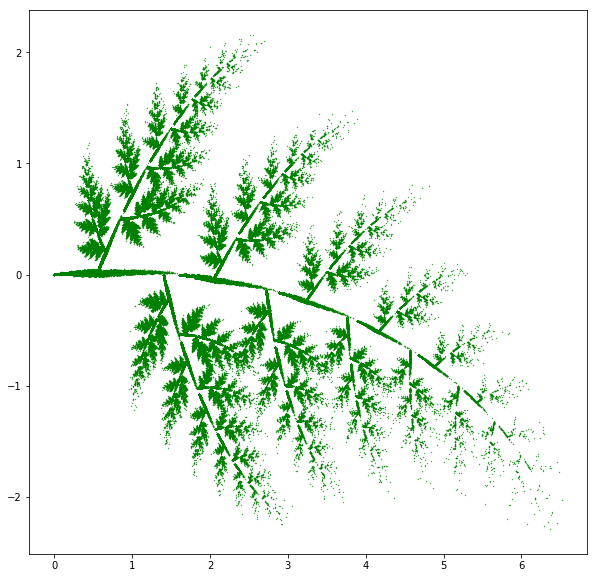

In [15]:
# Fern with equal probabilities

def prepare_barnsley_fern(probs=[0.25, 0.25, 0.25, 0.25], iterations=1000000):
    choices = [1, 2, 3, 4]
    parameters = {
        1: [0.24, -0.007, 0.007, 0.015, 0, 0],
        2: [0.22, -0.33, 0.36, 0.1, 0.54, 0],
        3: [0.14, -0.36, -0.38, -0.1, 1.4, 0],
        4: [0.8, 0.1, -0.1, 0.8, 1.6, 0]
    }
    start_point = [np.random.rand(), np.random.rand()]
    points = [start_point]
    for i in range(0, iterations):
        no = np.random.choice(choices, p=probs)
        x = points[-1][0] * parameters[no][0] + points[-1][1] * parameters[no][1] + parameters[no][4]
        y = points[-1][0] * parameters[no][2] + points[-1][1] * parameters[no][3] + parameters[no][5]
        points.append([x, y])
    return np.asarray(points)

my_fern = prepare_barnsley_fern()
plt.figure(figsize=(10,10))
plt.scatter(my_fern[:, 0], my_fern[:, 1], s=0.1, c='g')

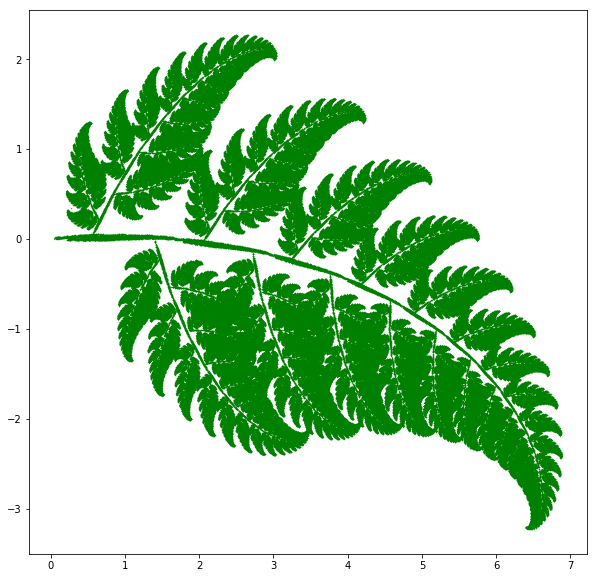

In [16]:
# Fern with calculated probabilities

def prepare_barnsley_fern(probs=[0.25, 0.25, 0.25, 0.25], iterations=1000000):
    choices = [1, 2, 3, 4]
    parameters = {
        1: [0.24, -0.007, 0.007, 0.015, 0, 0],
        2: [0.22, -0.33, 0.36, 0.1, 0.54, 0],
        3: [0.14, -0.36, -0.38, -0.1, 1.4, 0],
        4: [0.8, 0.1, -0.1, 0.8, 1.6, 0]
    }
    start_point = [np.random.rand(), np.random.rand()]
    points = [start_point]
    for i in range(0, iterations):
        no = np.random.choice(choices, p=probs)
        x = points[-1][0] * parameters[no][0] + points[-1][1] * parameters[no][1] + parameters[no][4]
        y = points[-1][0] * parameters[no][2] + points[-1][1] * parameters[no][3] + parameters[no][5]
        points.append([x, y])
    return np.asarray(points)

normalized_probabilities = normalize_list(np.asarray(probabilities))
normalized_probabilities = normalized_probabilities.tolist()
my_fern = prepare_barnsley_fern(probs=normalized_probabilities)
plt.figure(figsize=(10,10))
plt.scatter(my_fern[:, 0], my_fern[:, 1], s=0.1, c='g')

It's easy to see which fern is healthier :) Probability changes everything but calculations are complicated.



## 4.2 Examples of image processing

Images created by IFS algorithms may be easily transformed: zoomed, translated, rotated, extended and squeezed.

### Zooming

Assumption 1: our IFS is described as affine transform of plane $ w(z) = Az + C $, where $ z = (x, y) $ is a point in this plane, $ A $ is a square matrix and $ C $ is a vector. 

Then to zoom in or zoom out we must multiply parameter $ C $ by $ r > 0 $.

### Translation

To translate our attractor we should use different operation and instead of $ C $ we should use $ z_{0} - Az_{0} + C $. Our attractor will be translated by a vector $ z_{0} = (x_{0}, y_{0}) $.

### Rotation

Assumption 2: our IFS is described as a complex numbers operation $ w(z) = az + bz^* + c $. Then, to rotate our point by angle $ \phi $ from the center of a coordinate system, we must perform operation: $ w(z) = az + be^{2i\phi}z^* + c $

### Other

The last but not least technique is to transform each point from the generated fractal by these operation and generate new point or set of points. It will be well visible in the example.

### Example 4.2: Cantor Set processing

#### Base case:

Set $ [R^2; w_{1}; w_{2}; p_{1}; p_{2}] $ with probabilities $ p_{1} = p_{2} = 0.5 $ and two transformations described by equations:

$$\begin{equation}
w_{1}(z) = \frac{e^{\frac{i\pi}{6}}}{\sqrt{3}}*z^* \\
w_{2}(z) = \frac{e^{\frac{-i\pi}{6}}}{\sqrt{3}}*z^* + \sqrt{3}*e^{\frac{i\pi}{6}} \\
\end{equation}$$

In [17]:
def example_42_base(x, y, iterations):
    z = complex(x, y)
    points_list = [[x, y]]
    const_var_a = np.exp((np.pi * 1j) / 6) / np.sqrt(3)
    const_var_b = np.exp(-(np.pi * 1j) / 6) / np.sqrt(3)
    const_var_c = np.exp((np.pi * 1j) / 6) * np.sqrt(3)
    for i in range(0, iterations):
        test = np.random.choice(['w1', 'w2'])
        if test == 'w1':
            z = const_var_a * z.conjugate()
        elif test == 'w2':
            z = const_var_b * z.conjugate() + const_var_c
        else:
            raise ValueError('Too much equations?!')
        points_list.append([z.real, z.imag])
    return np.asarray(points_list)

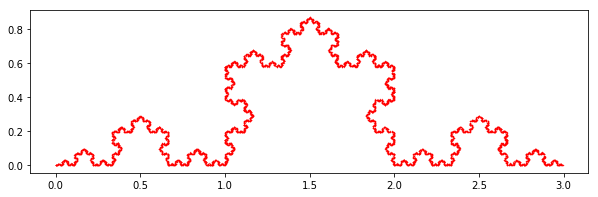

In [18]:
base_cantor = example_42_base(x=0, y=0, iterations=10000)
plt.figure(figsize=(10,3)) # y space is approximately 3.46 times smaller than x space
plt.scatter(base_cantor[:, 0], base_cantor[:, 1], s=0.1, c='r')

#### von Koch's Star:

Instead of drawing only point $ z_{n} $ we will draw additional two points which are rotated and translated: 

$$\begin{equation} z_{n} \\
z^{*}_{n}* e^{-\frac{i\pi}{3}} \\
z^{*}_{n}* e^{\frac{i\pi}{3}} + 3e^{-\frac{i\pi}{3}} \\
\end{equation}$$

In [19]:
def example_42_star(x, y, iterations):
    z = complex(x, y)
    points_list = [[x, y]]
    const_var_a = np.exp((np.pi * 1j) / 6) / np.sqrt(3)
    const_var_b = np.exp(-(np.pi * 1j) / 6) / np.sqrt(3)
    const_var_c = np.exp((np.pi * 1j) / 6) * np.sqrt(3)
    
    star_const_a = np.exp(-(np.pi * 1j) / 3)
    star_const_b = np.exp((np.pi * 1j) / 3)
    
    for i in range(0, iterations):
        test = np.random.choice(['w1', 'w2'])
        if test == 'w1':
            z = const_var_a * z.conjugate()
        elif test == 'w2':
            z = const_var_b * z.conjugate() + const_var_c
            points_list.append([z.real, z.imag])
        else:
            raise ValueError('Too much equations?!')
        z_s_1 = z.conjugate() * star_const_a
        z_s_2 = z.conjugate() * star_const_b + 3 * star_const_a
        points_list.append([z.real, z.imag])
        points_list.append([z_s_1.real, z_s_1.imag])
        points_list.append([z_s_2.real, z_s_2.imag])
    return np.asarray(points_list)

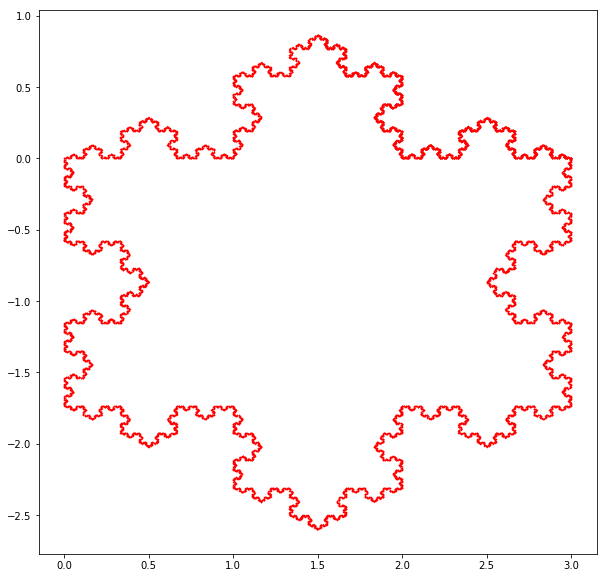

In [20]:
star_cantor = example_42_star(x=0, y=0, iterations=10000)
plt.figure(figsize=(10,10))
plt.scatter(star_cantor[:, 0], star_cantor[:, 1], s=0.1, c='r')

#### von Koch's snowflake

We can add scaling to our list of operations (transfromations) of each point to create snowflake instead of a star. 

In [21]:
class Snowflake:
    
    def __init__(self, x, y, iterations):
        self.z = complex(x, y)
        self.points_list = [[x, y]]
        self.x = x
        self.y = y
        self.iters = iterations
        self.star_const_a = np.exp(-(np.pi * 1j) / 3)
        self.star_const_b = np.exp((np.pi * 1j) / 3)
        self.c = {
            'w1': 1,
            'w2': 2,
            'w3': 3,
            'w4': 4,
            'w5': 5,
            'w6': 6,
            'w7': 0
        }

    def _calculate_w(self):
        key = np.random.choice(list(self.c.keys()))
        w = 0.33 * self.z + np.exp((1j * np.pi * self.c[key]) / 3)
        return w
    
    def build_snowflake(self):
        
        for i in range(0, self.iters):
            z = self._calculate_w()
            self.points_list.append([z.real, z.imag])
            self.z = z
        return np.asarray(self.points_list)

In [22]:
snowflake = Snowflake(0, 0, 100000)

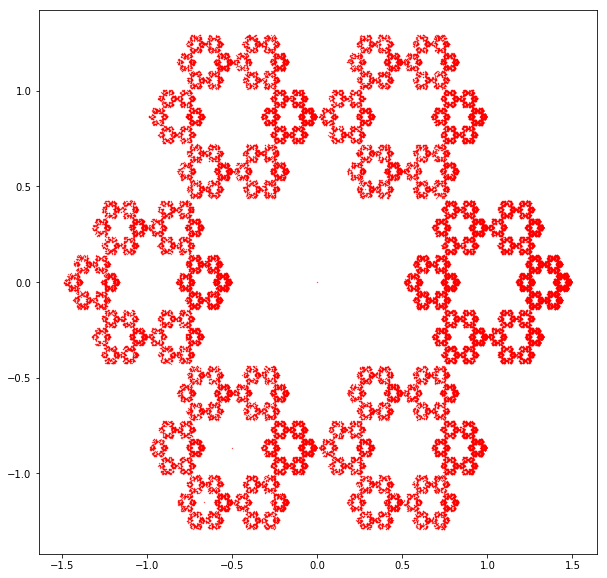

In [23]:
data = snowflake.build_snowflake()
plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], s=0.1, c='r')

## Christmas tree... forest

### Base equations

$$\begin{eqnarray}
x' = a_{11}x + a_{12}y + c_{1} \\
y' = a_{21}x + a_{22}y + c_{2} \\
\end{eqnarray}$$

Example values:

No. | $ a_{11} $ | $ a_{12} $ | $ a_{21} $ | $ a_{22} $ | $ c_{1} $ | $ c_{2} $ |
--- | ---------- | ---------- | ---------- | ---------- | --------- | --------- |
1 | -0.67 | -0.02 | -0.18 | 0.81 | 0.00 | 1.02 |
2 | 0.40 | 0.40 | -0.10 | 0.40 | -0.04 | 0.06 |
3 | -0.40 | -0.40 | -0.10 | 0.40 | 0.04 | 0.06 |
4 | -0.10 | 0.00 | 0.44 | 0.44 | 0.00 | -0.14 |

### Transformations

#### f(1) Scale

$ c{1} $ and $ c{2} $ multiplied by positive number (real)

<i> In the full matrix notation: </i>

\begin{equation*}
\begin{vmatrix} x^* \\ y^* \end{vmatrix} =  \begin{vmatrix}
a_{11} & a_{12} \\
a_{21} &  a_{22} \end{vmatrix}
\begin{vmatrix} x \\ y \end{vmatrix} + n\begin{vmatrix} c_{1} \\ c_{2} \end{vmatrix}\end{equation*}

where $ n $ is a positive number.

#### f(2) Translate

$$ C => z_{0} - Az_{0} + C
=> (x_{0}, y_{0}) - (a_{11}x_{0} + a_{12}y_{0}, a_{21}x_{0} + a_{22}y_{0}) + (c_{1}, c_{2}) $$

#### f(3) Mixed

Scaling + Translation

### Example 4.3.1: normal and scaled Christmas tree

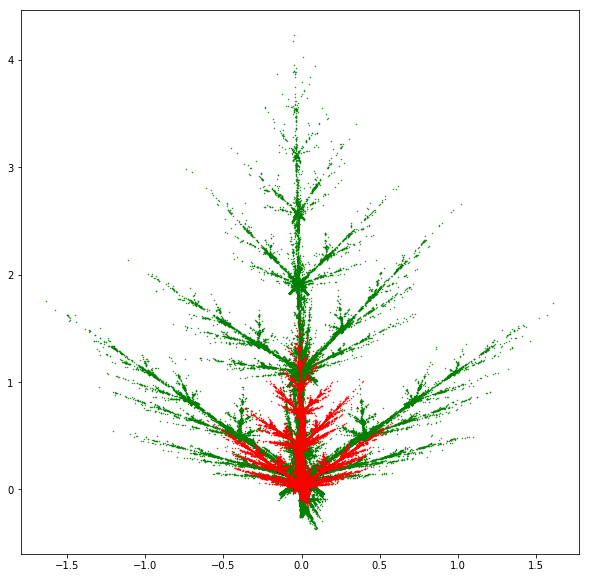

In [58]:
def prepare_christmas_tree(iterations=1000000, scale=1):
    choices = [1, 2, 3, 4]
    parameters = {
        1: {'A': np.asarray([[-0.67, -0.02], [-0.18, 0.81]]), 
            'C': np.asarray([[0.00], [1.02]])},
        
        2: {'A': np.asarray([[0.40, 0.40], [-0.10, 0.40]]), 
            'C': np.asarray([[-0.04], [0.06]])},
        
        3: {'A': np.asarray([[-0.40, -0.40], [-0.10, 0.40]]),
            'C': np.asarray([[0.04], [0.06]])},
        
        4: {'A': np.asarray([[-0.10, 0.00], [0.44, 0.44]]),
            'C': np.asarray([[0.00], [-0.14]])}
    }
    
    start_point = np.asarray([[np.random.rand()], [np.random.rand()]])
    points = start_point
    ifs = [[points[0][0], points[1][0]]]
    for i in range(0, iterations):
        param = parameters[np.random.choice(choices)]
        param_A = param['A']
        param_C = param['C']
        
        if scale != 1:
            param_C = param_C * scale
        
        z = param_A.dot(points) + param_C
        points[0] = z[0]
        points[1] = z[1]
        ifs.append([z[0][0], z[1][0]])
    return np.asarray(ifs)

iters = 100000
parent_tree = prepare_christmas_tree(iterations=iters)
child_tree = prepare_christmas_tree(iterations=iters, scale=0.37)
plt.figure(figsize=(10,10))
plt.scatter(parent_tree[:, 0], parent_tree[:, 1], s=0.2, c='g')
plt.scatter(child_tree[:, 0], child_tree[:, 1], s=0.2, c='r')

### Example 4.3.2: normal and translated Christmas tree